# 효율적 투자 전략
* 대상 종목 : 주식, 채권

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



In [10]:
sdf = pd.read_csv("./자료폴더/kodex_stock.csv"   ,parse_dates=["dt"])
bdf = pd.read_csv("./자료폴더/kodex_bond10y.csv" ,parse_dates=["dt"])

In [11]:
sdf.shape, bdf.shape

((1845, 6), (1845, 6))

In [12]:
sdf.head()

,dt,close,high,low,open,volume
0,2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0
1,2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0
2,2012-01-26,49930.0,49985.0,49925.0,49960.0,1161.0
3,2012-01-27,50000.0,57200.0,49810.0,57200.0,104.0
4,2012-01-30,50130.0,50130.0,50000.0,50000.0,1080.0


In [13]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      1845 non-null   datetime64[ns]
 1   close   1845 non-null   float64       
 2   high    1845 non-null   float64       
 3   low     1845 non-null   float64       
 4   open    1845 non-null   float64       
 5   volume  1845 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 86.6 KB


In [17]:
sdf = sdf.set_index("dt")
sdf.head()

,close,high,low,open,volume
dt,,,,,
2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0
2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0
2012-01-26,49930.0,49985.0,49925.0,49960.0,1161.0
2012-01-27,50000.0,57200.0,49810.0,57200.0,104.0
2012-01-30,50130.0,50130.0,50000.0,50000.0,1080.0


In [14]:
bdf.head()

,dt,close,high,low,open,volume
0,2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.50
1,2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.00
2,2012-01-26,23299.6,23428.5,23237.4,23428.5,2162210.50
3,2012-01-27,23335.2,23419.6,23206.3,23419.6,3456417.50
4,2012-01-30,23073.0,23308.5,23050.8,23241.9,2899746.25


In [15]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      1845 non-null   datetime64[ns]
 1   close   1845 non-null   float64       
 2   high    1845 non-null   float64       
 3   low     1845 non-null   float64       
 4   open    1845 non-null   float64       
 5   volume  1845 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 86.6 KB


In [18]:
bdf = bdf.set_index("dt")
bdf.head()

,close,high,low,open,volume
dt,,,,,
2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.50
2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.00
2012-01-26,23299.6,23428.5,23237.4,23428.5,2162210.50
2012-01-27,23335.2,23419.6,23206.3,23419.6,3456417.50
2012-01-30,23073.0,23308.5,23050.8,23241.9,2899746.25


### 주식과 채권은 몇대몇의 비율이어야 최대의 포트폴리오를 얻는가?

In [26]:
df = pd.DataFrame([])
df

""


In [27]:
df[["주식_pct_chg"]] = sdf[["close"]].pct_change()
df[["주식_pct_chg"]]

,주식_pct_chg
dt,
2012-01-20,NaN
2012-01-25,0.000000
2012-01-26,-0.000600
2012-01-27,0.001402
2012-01-30,0.002600
...,...
2019-07-17,0.002181
2019-07-18,0.006390
2019-07-19,0.001465


In [28]:
df[["채권_pct_chg"]] = bdf[["close"]].pct_change()
df[["채권_pct_chg"]]

,채권_pct_chg
dt,
2012-01-20,NaN
2012-01-25,0.003449
2012-01-26,0.000954
2012-01-27,0.001528
2012-01-30,-0.011236
...,...
2019-07-17,-0.008919
2019-07-18,-0.002204
2019-07-19,0.013989


In [29]:
df

,주식_pct_chg,채권_pct_chg
dt,,
2012-01-20,NaN,NaN
2012-01-25,0.000000,0.003449
2012-01-26,-0.000600,0.000954
2012-01-27,0.001402,0.001528
2012-01-30,0.002600,-0.011236
...,...,...
2019-07-17,0.002181,-0.008919
2019-07-18,0.006390,-0.002204
2019-07-19,0.001465,0.013989


In [30]:
# ret ---------------
day_ret = df
year_ret = df.mean() *252
# cov ---------------
day_cov = day_ret.cov()
year_cov = day_cov *252

In [77]:
port_ret = []
port_w = []
port_risk = []
port_sharp = []

for _ in range(20000):
    w = np.random.random(len(df.columns))
    w = w / np.sum(w)
    
    ret   = np.dot(w, year_ret)
    risk  = np.dot( w.T, np.dot( year_cov, w ) )
    sharp = ret / risk
    
    port_ret.append(ret)
    port_risk.append(risk)
    port_w.append(np.round(w,2))
    port_sharp.append(sharp)
    
port_dict = {"Returns": port_ret,"Risk": port_risk,"Sharp": port_sharp,"Weights": port_w}
port_df = pd.DataFrame(port_dict)

In [78]:
port_df.head()

,Returns,Risk,Sharp,Weights
0,0.042564,0.003385,12.574010,"[0.57, 0.43]"
1,0.040905,0.004669,8.761822,"[0.48, 0.52]"
2,0.041177,0.004434,9.285943,"[0.49, 0.51]"
3,0.044089,0.002507,17.584625,"[0.65, 0.35]"
4,0.048314,0.001590,30.389504,"[0.89, 0.11]"


In [79]:
Risk_df = port_df[port_df['Risk']==port_df['Risk'].min()]
Risk_df

,Returns,Risk,Sharp,Weights
18172,0.047945,0.001581,30.319263,"[0.87, 0.13]"


In [80]:
Returns_df = port_df[port_df['Returns']==port_df['Returns'].max()]
Returns_df

,Returns,Risk,Sharp,Weights
5669,0.050284,0.001922,26.160212,"[1.0, 0.0]"


In [81]:
sharp_df = port_df[port_df['Sharp']==port_df['Sharp'].max()]
sharp_df

,Returns,Risk,Sharp,Weights
4761,0.048208,0.001586,30.402765,"[0.88, 0.12]"


In [82]:
sharp_df["Weights"]

4761    [0.88, 0.12]
Name: Weights, dtype: object

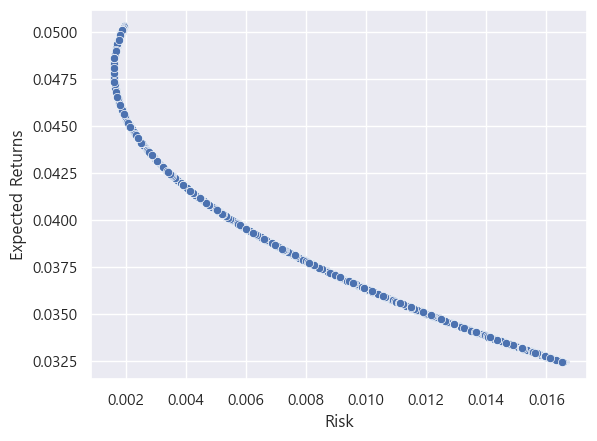

In [83]:
sns.scatterplot(data=port_df,    x="Risk" ,y="Returns")
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

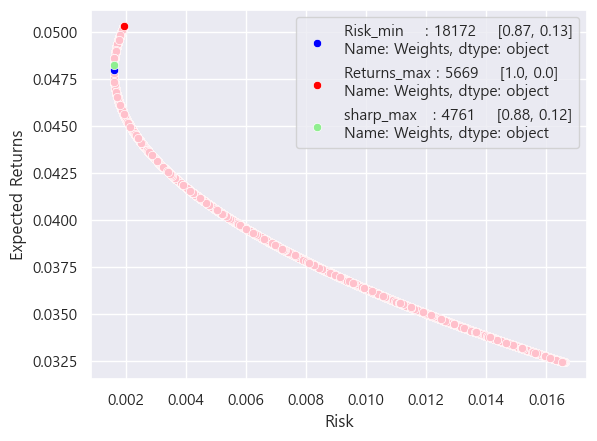

In [93]:
sns.scatterplot(data=port_df,    x="Risk" ,y="Returns"  ,c="pink")
sns.scatterplot(data=Risk_df,    x="Risk" ,y="Returns"  ,c="blue"        , label=f"Risk_min    : {Risk_df['Weights']}")
sns.scatterplot(data=Returns_df, x="Risk" ,y="Returns"  ,c="red"         , label=f"Returns_max : {Returns_df['Weights']}")
sns.scatterplot(data=sharp_df,   x="Risk" ,y="Returns"  ,c="lightgreen"  , label=f"sharp_max   : {sharp_df['Weights']}")

plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

In [67]:
sharp_df["Weights"].values[0][0]

0.8836019030562754

In [70]:
print(f"주식비율:{sharp_df['Weights'].values[0][0]}, 채권비율:{sharp_df['Weights'].values[0][1]}")

주식비율:0.8836019030562754, 채권비율:0.11639809694372463
